# 06-08 다층 퍼셉트론으로 MNIST 분류하기

## 1. 데이터 로드하기

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


이 이미지 데이터의 레이블은 5이다


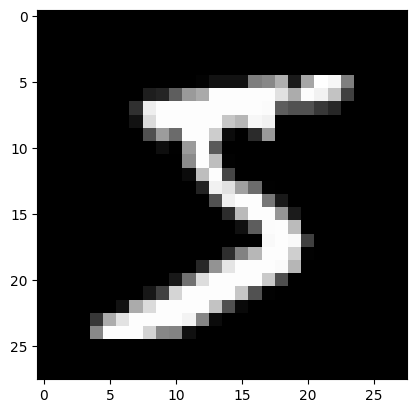

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.data[0]
mnist.target[0]

mnist.target = mnist.target.astype(np.int8)

X = mnist.data / 255
y = mnist.target

X[0]
y[0]

plt.imshow(X[0].reshape(28, 28), cmap='gray')
print('이 이미지 데이터의 레이블은 {:.0f}이다'.format(y[0]))

## 2. 훈련 데이터와 테스트 데이터의 분리

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7,
                                                    random_state = 0)
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

## 3. 다층 퍼셉트론

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

테스트 데이터에서 예측 정확도: 1016/10000 (10%)

epoch0 : 완료

epoch1 : 완료

epoch2 : 완료


테스트 데이터에서 예측 정확도: 9543/10000 (95%)

예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다.


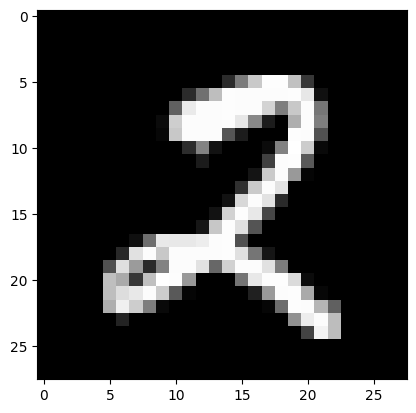

In [ ]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train(epoch):
  model.train()   # 신경망을 학습 모드로 전환

  # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
  for data, targets in loader_train:
    optimizer.zero_grad()   # 경사를 0으로 초기화
    outputs = model(data)   # 데이터를 입력하고 출력을 계산
    loss = loss_fn(outputs, targets)   # 출력과 훈련 데이터 정답간의 오차를 계산
    loss.backward()   # 오차를 역전파 계산
    optimizer.step()    # 역전파 계산한 값으로 가중치를 수정
  print("epoch{} : 완료\n".format(epoch))

def test():
  model.eval()  # 신경망을 추론 모드로 전환
  correct = 0

  # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
  with torch.no_grad():
    for data, targets in loader_test:
      outputs = model(data)   # 데이터를 입력하고 출력을 계산

      # 추론 계산
      _, predicted = torch.max(outputs.data, 1)   # 확률이 가장 높은 레이블이 무엇인지 계산
      correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)   # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct, data_num,
                                                          100. * correct / data_num))
test()

for epoch in range(3):
  train(epoch)
test()

index = 2018
model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다.".format(y_test[index]))

In [1]:
cd /content/drive/MyDrive/Colab Notebooks/Commit_Test_Folder/PyTorch_Basic

/content/drive/MyDrive/Colab Notebooks/Commit_Test_Folder/PyTorch_Basic


In [2]:
!git pull

Already up to date.


In [6]:
!git config --global user.email 'gkswltjr00@gmail.com'
!git config --global user.name 's-kan'

In [7]:
!git add .

In [8]:
!git commit -m 'ANN'
!git push

[main 20d4fae] ANN
 4 files changed, 4 insertions(+), 1 deletion(-)
 create mode 100644 PyTorch_06_06.ipynb
 create mode 100644 PyTorch_06_07.ipynb
 create mode 100644 PyTorch_06_08.ipynb
remote: Invalid username or password.
fatal: Authentication failed for 'https://github.com/s-kan/PyTorch_Basic.git/'
